<a href="https://colab.research.google.com/github/syq-tju/GPUMD/blob/master/cuBLAS_cuBLASLt_CUTLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/NVIDIA/cutlass.git



In [19]:
!nvcc cublas_example.cu -o cublas_example -lcublas
!./cublas_example


cuBLAS time: 4.14928 ms


In [20]:
!nvcc cublaslt_example.cu -o cublaslt_example -lcublasLt
!./cublaslt_example



cuBLASLt time: 3.9465 ms


In [21]:
!nvcc cutlass_example.cu -o cutlass_example -Icutlass/include -Icutlass/tools/util/include -L/usr/local/cuda/lib64 -lcuda -lcudart -lcublas -lcublasLt -lnvToolsExt
!./cutlass_example

cutlass/include/cutlass/conv/conv3d_problem_size.h(215): warning #20013-D: calling a constexpr __host__ function("get") from a __host__ __device__ function("Conv3dProblemSize") is not allowed. The experimental flag '--expt-relaxed-constexpr' can be used to allow this.
        {std::get<0>(padding)[1], std::get<1>(padding)[1],
         ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"

cutlass/include/cutlass/conv/conv3d_problem_size.h(215): warning #20013-D: calling a constexpr __host__ function("get") from a __host__ __device__ function("Conv3dProblemSize") is not allowed. The experimental flag '--expt-relaxed-constexpr' can be used to allow this.
        {std::get<0>(padding)[1], std::get<1>(padding)[1],
                                  ^

cutlass/include/cutlass/conv/conv3d_problem_size.h(216): warning #20013-D: calling a constexpr __host__ function("get") from a __host__ __device__ function("Conv3dProblemSize") is not allowed. The experimental flag '

In [30]:
!g++ -o cpu_matrix_multiplication cpu_matrix_multiplication.cpp
!./cpu_matrix_multiplication


Result matrix C:
70 80 90 
158 184 210 
CPU time: 0.000484 ms


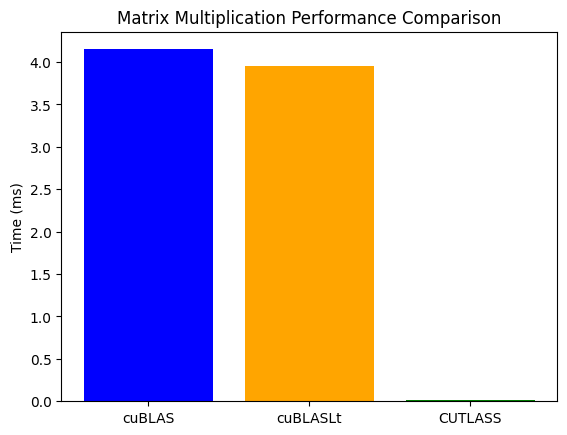

In [22]:
import matplotlib.pyplot as plt

# 从文件中读取时间数据
with open("timing_results_cublas.txt", "r") as f:
    time_cublas = float(f.readline().strip())

with open("timing_results_cublaslt.txt", "r") as f:
    time_cublasLt = float(f.readline().strip())

with open("timing_results_cutlass.txt", "r") as f:
    time_cutlass = float(f.readline().strip())

times = [time_cublas, time_cublasLt, time_cutlass]
labels = ['cuBLAS', 'cuBLASLt', 'CUTLASS']

plt.bar(labels, times, color=['blue', 'orange', 'green'])
plt.ylabel('Time (ms)')
plt.title('Matrix Multiplication Performance Comparison')
plt.show()
